In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path=r"C:\Users\LENOVO\Documents\Naresh IT\Datafiles\telecom_churn_data.csv"

***Step-1: Read the data***

In [3]:
data_df=pd.read_csv(path)
data_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**Step-2: Data quick checks**


In [4]:
data_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [5]:
data_df.size

32000

In [6]:
data_df.shape

(2000, 16)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

***Step-3: Convert categorical columns*** /
        ***Numerical columns names separately***


In [8]:
cat_colm=data_df.select_dtypes(include='object').columns
num_colm=data_df.select_dtypes(exclude='object').columns

In [9]:
cat_colm

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [10]:
cat_colm=cat_colm.drop('phone_no')

In [11]:
cat_colm

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [12]:
num_colm

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

***Step-4: You need fill the missing values***

In [13]:
data_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
path=r"C:\Users\LENOVO\Documents\Naresh IT\Datafiles\telecom_churn_data.csv"
data_df=pd.read_csv(path)

mode_gender=data_df['gender'].mode()
data_df['gender'].fillna(mode_gender[0],inplace=True)

mode_maximum_days_inactive=data_df['maximum_days_inactive'].mode()
data_df['maximum_days_inactive'].fillna(mode_maximum_days_inactive[0],inplace=True)

mode_churn=data_df['churn'].mode()
data_df['churn'].fillna(mode_churn[0],inplace=True)

In [16]:
mode_gender

0    Male
Name: gender, dtype: object

In [17]:
mode_maximum_days_inactive

0    3.0
Name: maximum_days_inactive, dtype: float64

In [18]:
mode_churn

0    0.0
Name: churn, dtype: float64

In [19]:
data_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [20]:
churn_int=data_df['churn'].astype(int)
data_df['churn']=churn_int
maximum_days_inactive_int=data_df['maximum_days_inactive'].astype(int)
data_df['maximum_days_inactive']=maximum_days_inactive_int

In [21]:
data_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3,3,0


***Step-5: Categorical data analysis***
- Unique
- nunique
- value counts
- bar chart
- count plot
- pie chart


In [22]:
for i in cat_colm:
    print(i,':',data_df[i].unique())

gender : ['Female' 'Male']
multi_screen : ['no' 'yes']
mail_subscribed : ['no' 'yes']


In [23]:
for i in cat_colm:
    print(i,';',data_df[i].nunique())

gender ; 2
multi_screen ; 2
mail_subscribed ; 2


In [24]:
for i in cat_colm[:]:
    cdm=data_df[i].value_counts()
    key=cdm.keys()
    value=cdm.values
    col=['lable','count']
    df=pd.DataFrame(zip(key,value),columns=col)
    path=r"C:\Users\LENOVO\Documents\Naresh IT\EDA\cat_colm"
    df.to_csv(f"{path}\\{i}.csv",index=False)

In [25]:
import os
dfa=os.listdir(path)
dfa

['gender.csv', 'mail_subscribed.csv', 'multi_screen.csv']

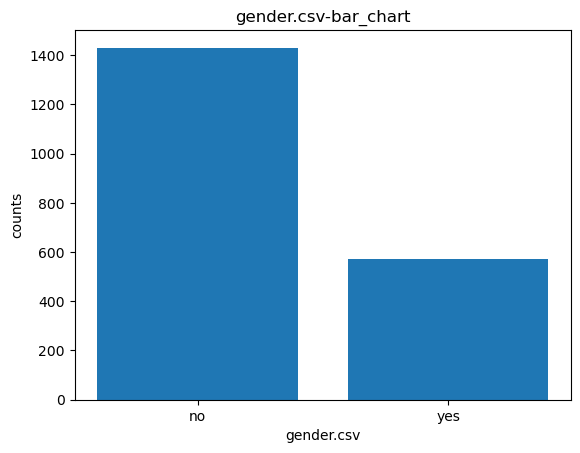

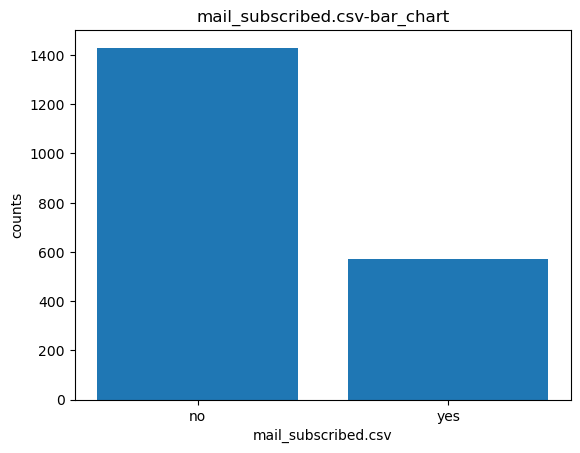

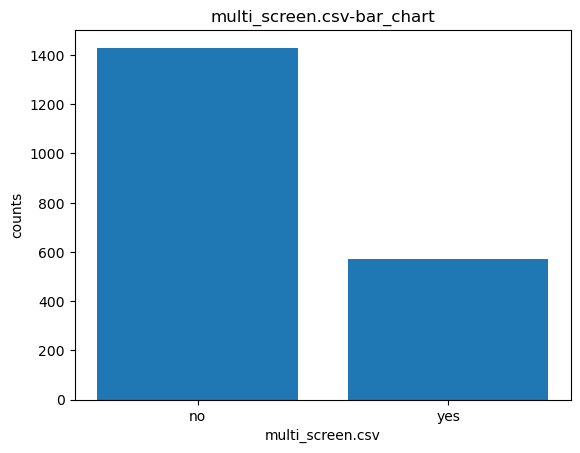

In [26]:
for i in dfa:
    df1=pd.read_csv(f"{path}\\{i}")
    plt.bar('lable','count',data=df)
    plt.title(f"{i}-bar_chart")
    plt.xlabel(f'{i}')
    plt.ylabel('counts')
    plt.show()

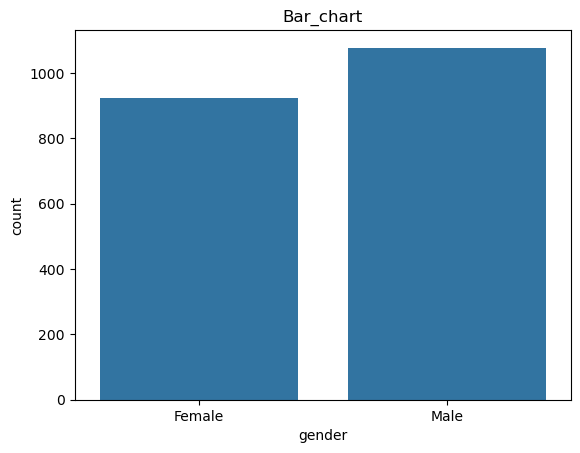

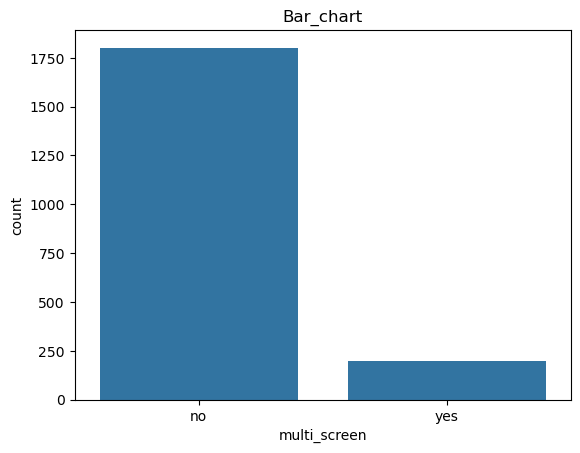

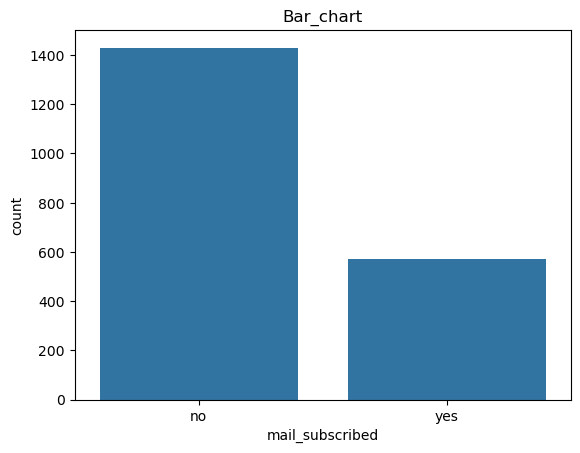

In [27]:
for i in cat_colm:
    sns.countplot(data=data_df,x=i)
    plt.title('Bar_chart')
    plt.show()
    

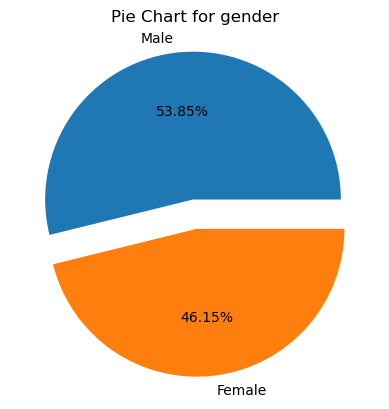

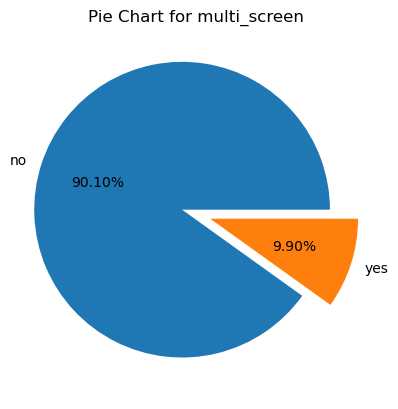

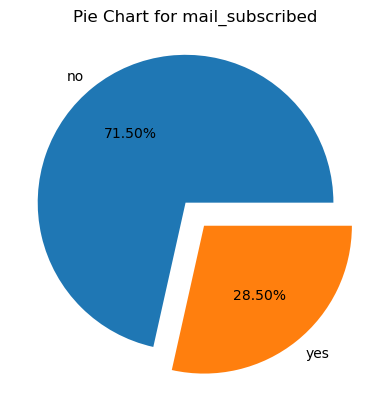

In [28]:
for i in cat_colm:
    df1=data_df[i].value_counts()
    key=df1.keys()
    value=df1.values
    explode=[0.1]*len(key)
    plt.pie(x=value,explode=explode,labels=key,autopct="%0.2f%%",radius=1)
    plt.title(f'Pie Chart for {i}')
    plt.show()

***Step-6: Numerical data analysis***
- Describe function
- Histogram
- Data skew ness

***Describe function***

In [29]:
data_df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


***Histogram***

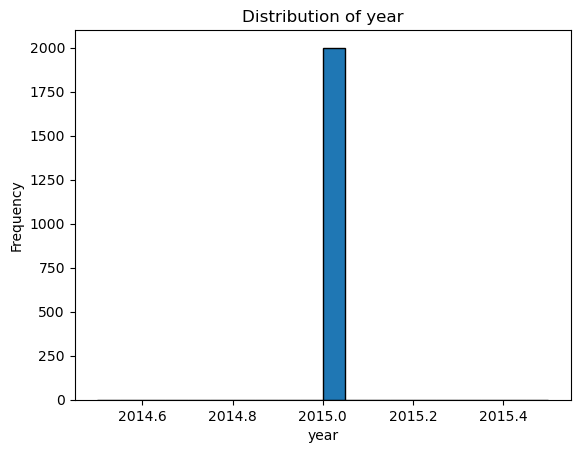

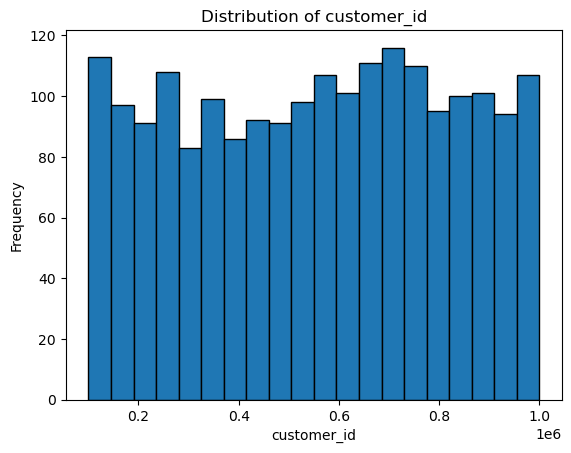

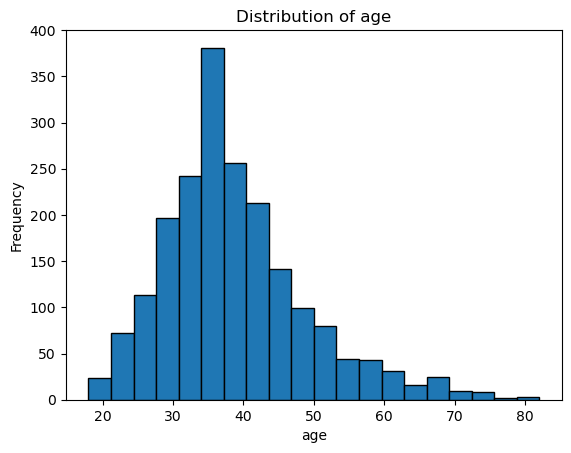

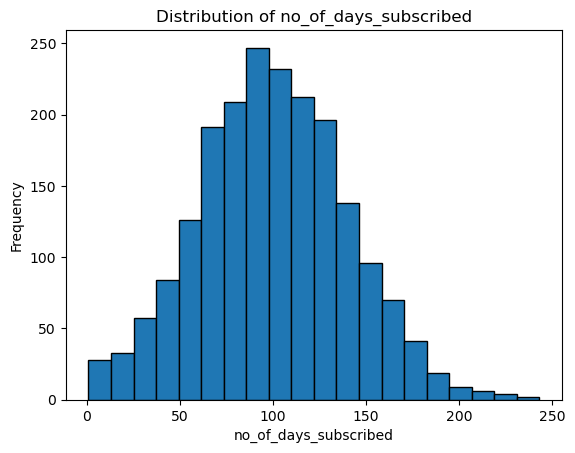

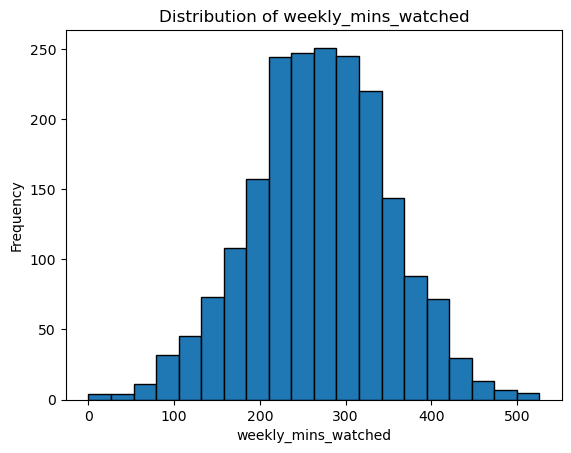

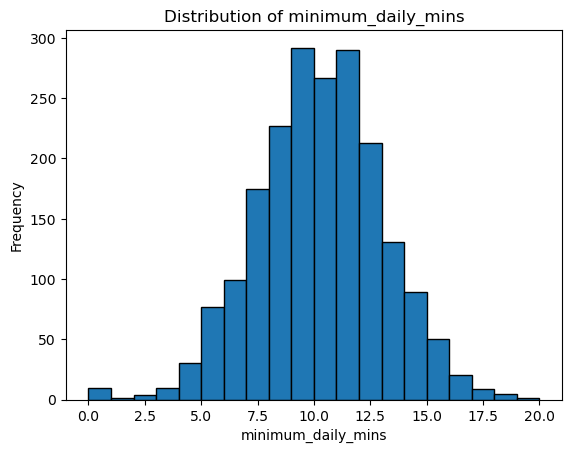

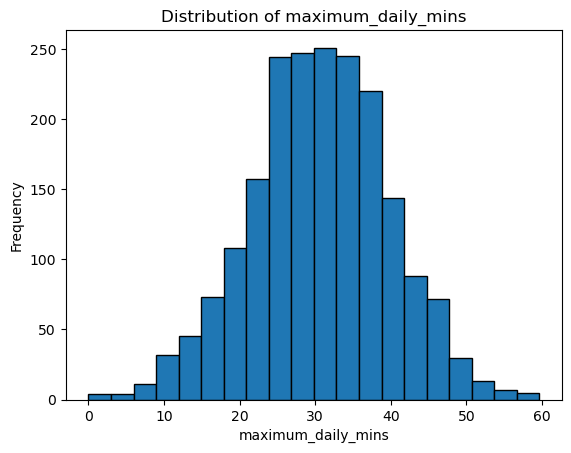

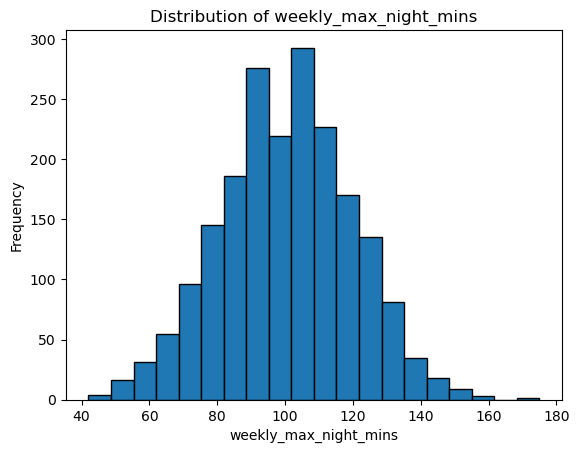

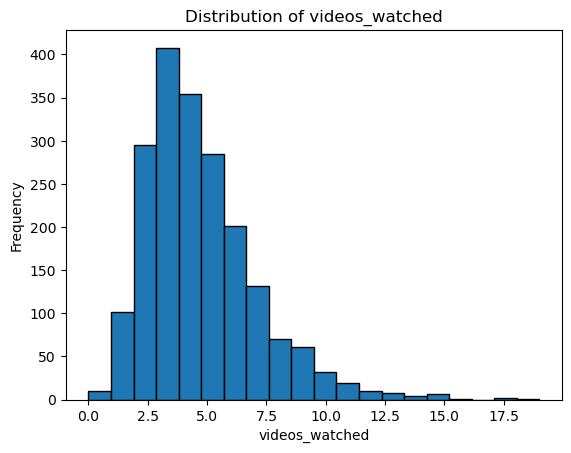

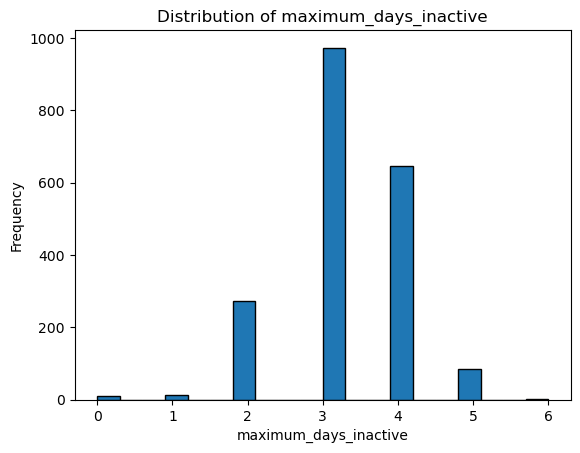

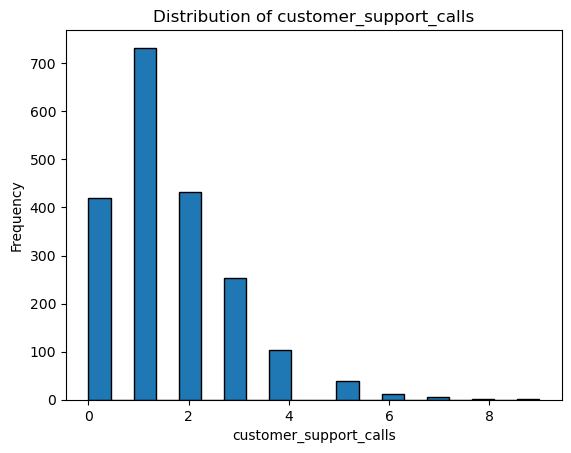

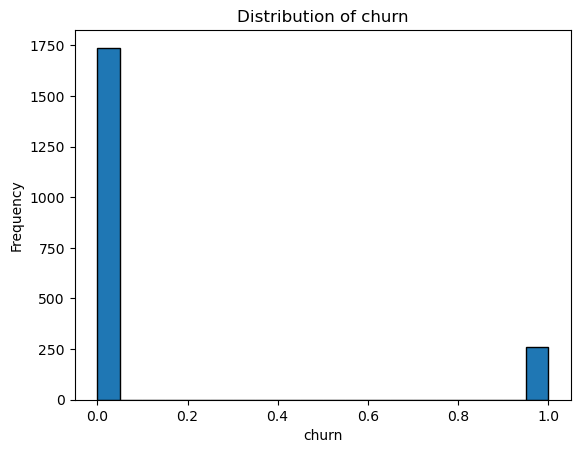

In [30]:
for i in num_colm:
    plt.hist(data_df[i],bins=20,edgecolor='black')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()
    


***Data skew ness***

In [31]:
for i in num_colm:
    print(f"Skewness of {i}: {data_df[i].skew()}")

Skewness of year: 0.0
Skewness of customer_id: -0.06189365739290977
Skewness of age: 0.9582239125921497
Skewness of no_of_days_subscribed: 0.14909079682262305
Skewness of weekly_mins_watched: -0.06711139839429965
Skewness of minimum_daily_mins: -0.16211138805928071
Skewness of maximum_daily_mins: -0.06710396397012122
Skewness of weekly_max_night_mins: -5.8364250005396545e-05
Skewness of videos_watched: 1.309208878643555
Skewness of maximum_days_inactive: -0.23852084695443798
Skewness of customer_support_calls: 1.128123987668132
Skewness of churn: 2.1889545122628737


***Step-7: Box plot creation
        Outlier analysis***

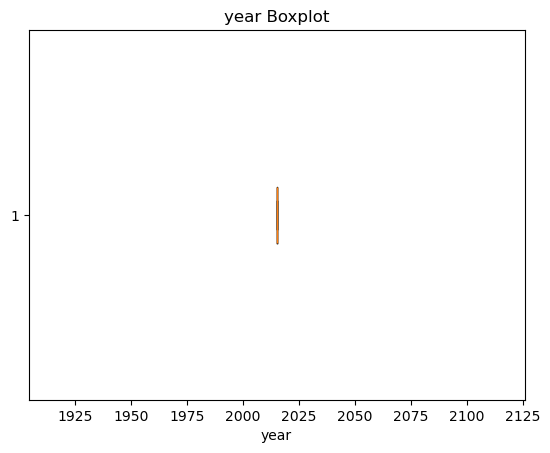

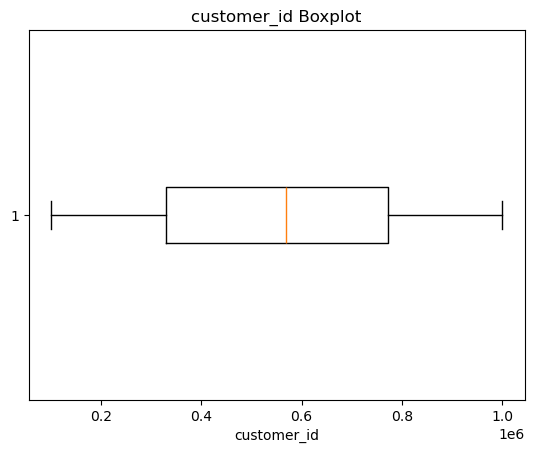

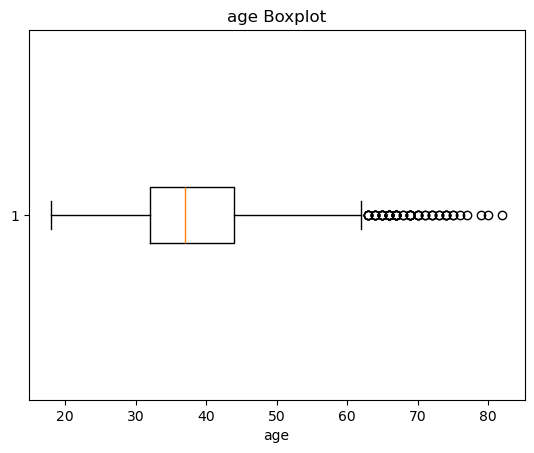

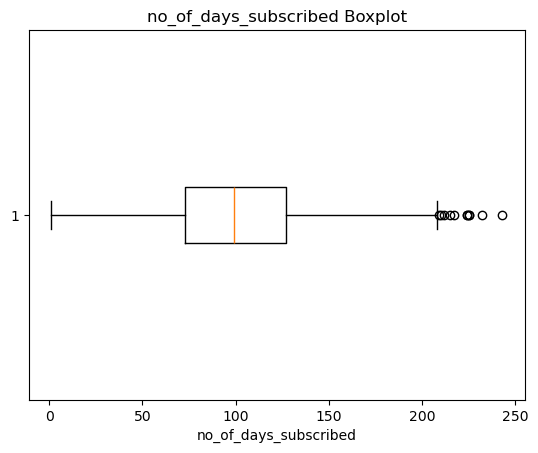

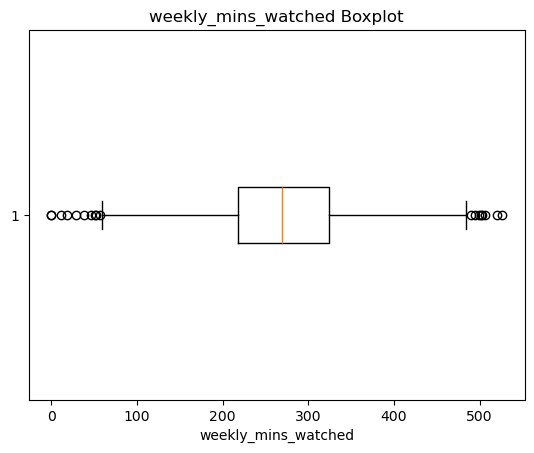

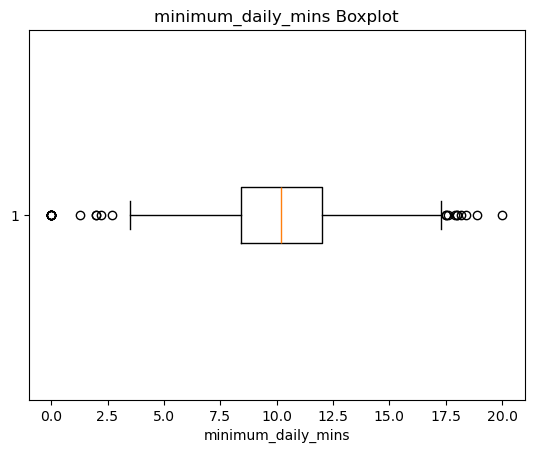

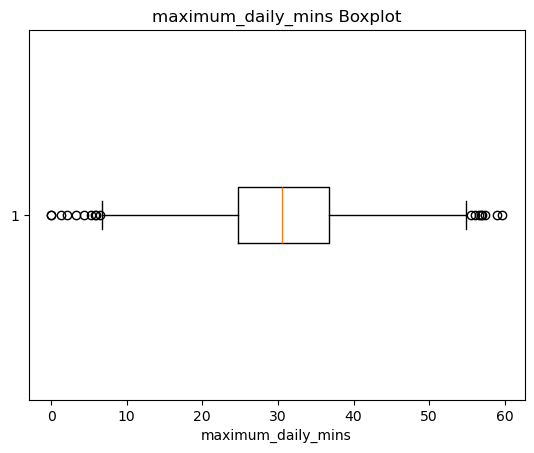

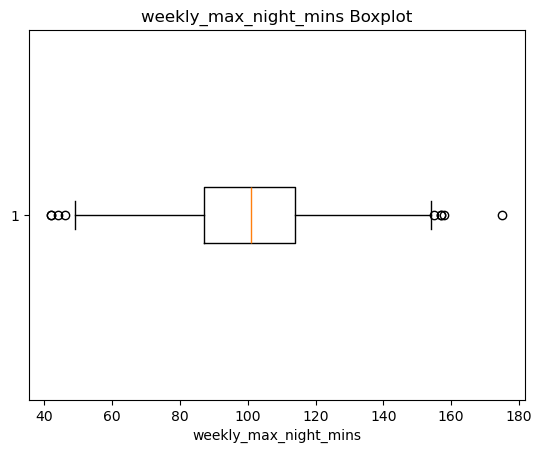

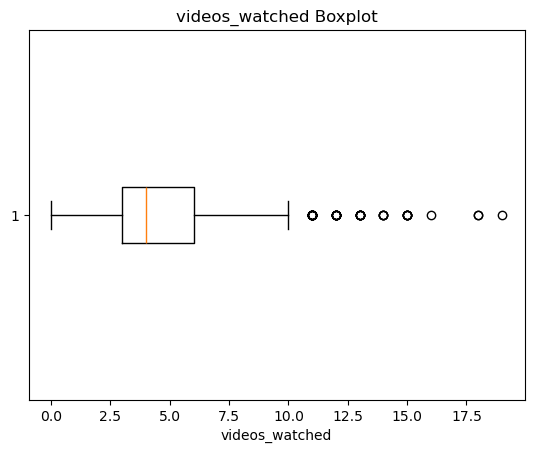

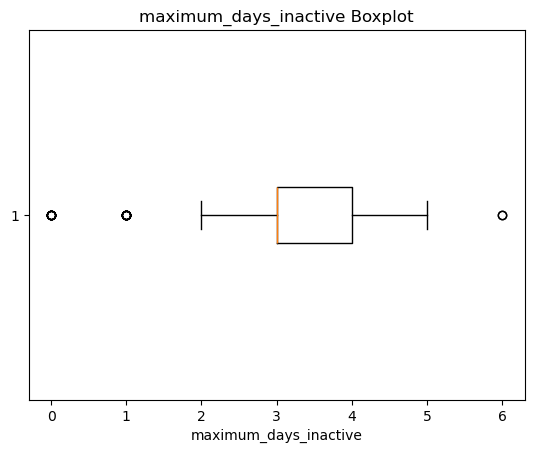

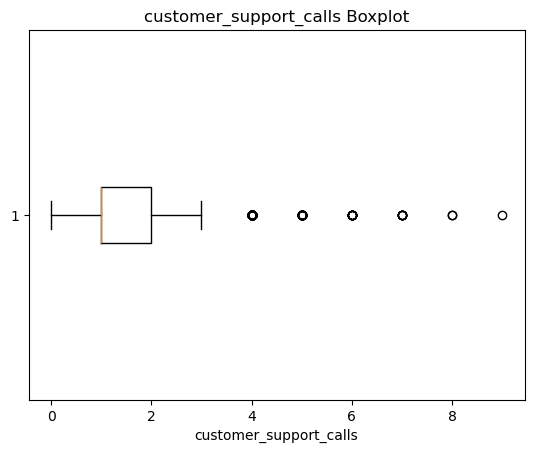

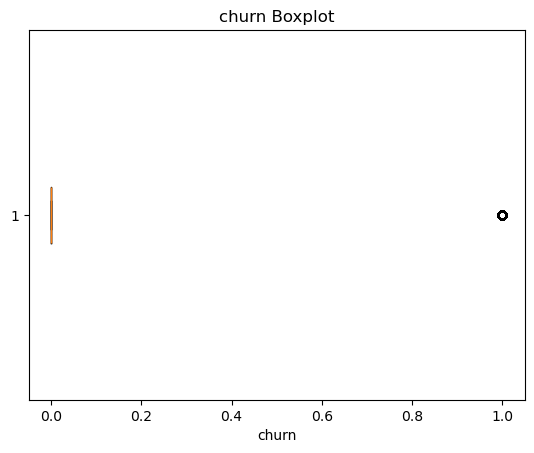

In [32]:
for i in num_colm:
    plt.boxplot(data_df[i], vert=False) 
    plt.title(f'{i} Boxplot') 
    plt.xlabel(f'{i}')  
    plt.show() 

# # Box plot for numerical columns to analyze outliers
# for i in num_colm:
#     data_df[i].plot(kind='box')
#     plt.show()

***Outlier analysis***


In [33]:
for i in num_colm:
    q1=np.percentile(data_df[i],25)
    q3=np.percentile(data_df[i],75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    con1=data_df[i]<lb
    con2=data_df[i]>ub
    con3=con1|con2
    outliers_data=data_df[con3]
outliers_data
    

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
5,2015,101953,329-6603,Male,31,65,no,no,193.65,12.7,21.95,111,6,4,4,1
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,3,5,1
18,2015,107251,339-1330,Male,39,115,no,no,367.50,13.7,41.65,124,8,4,1,1
22,2015,108519,408-6326,Female,45,76,no,no,395.10,11.4,44.78,101,5,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,2015,968500,345-1524,Male,36,101,no,no,134.55,13.5,15.25,93,11,4,5,1
1936,2015,971483,378-3625,Female,37,208,no,no,489.75,10.7,55.51,102,6,3,2,1
1940,2015,971989,409-7523,Female,33,125,yes,no,280.95,9.6,31.84,112,2,3,0,1
1959,2015,979909,384-5004,Male,29,144,no,no,417.75,11.6,47.35,90,5,4,1,1


In [34]:
for i in num_colm:
    q1=np.percentile(data_df[i],25)
    q3=np.percentile(data_df[i],75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    con1=data_df[i]>=lb
    con2=data_df[i]<=ub
    con3=con1&con2
    non_outliers_data=data_df[con3]
non_outliers_data
    
    

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
6,2015,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3,2,0
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0


***Step-8: Transformation methods***


In [35]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
data_df['age']=pt.fit_transform(np.array(data_df['age']).reshape(-1,1))
data_df

# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# transform_age = pt.fit_transform(data_df[['age']])
# transform_age


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,-0.128386,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,340-5930,Female,0.187861,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,2015,100756,372-3750,Female,2.077540,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,2015,101595,331-4902,Female,-1.816409,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,351-8398,Female,0.286736,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,1.417000,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,383-9255,Male,0.739470,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,353-2080,Male,1.348825,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,2015,998934,359-7788,Male,0.286736,94,no,no,178.05,10.4,20.18,100,6,3,3,0


***Step-9: Encoding methods***
- map
- np.where
- LabelEncoder
- onehot encoder


**map**

In [36]:
cat_colm=data_df.select_dtypes(include='object').columns
for i in cat_colm:
    unique_lables=data_df[i].unique()
    list1=[i for i in range(len(unique_lables))]
    dict1=dict(zip(unique_lables,list1))
    data_df[i]=data_df[i].map(dict1) 
print(list1)
print(dict1)
data_df

[0, 1]
{'no': 0, 'yes': 1}


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,0,0,-0.128386,62,0,0,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,1,0,0.187861,149,0,0,294.45,7.7,33.37,87,3,3,2,0
2,2015,100756,2,0,2.077540,126,0,0,87.30,11.9,9.89,91,1,4,5,1
3,2015,101595,3,0,-1.816409,131,0,1,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,4,0,0.286736,191,0,0,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,1995,0,1.417000,75,0,1,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,1996,1,0.739470,127,0,0,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,1997,1,1.348825,94,0,0,128.85,15.6,14.60,110,16,5,0,0
1998,2015,998934,1998,1,0.286736,94,0,0,178.05,10.4,20.18,100,6,3,3,0


**LabelEncoder**

In [37]:
from sklearn.preprocessing import LabelEncoder
path=r"C:\Users\LENOVO\Documents\Naresh IT\Datafiles\telecom_churn_data.csv"
data_df=pd.read_csv(path)
cat_colm=data_df.select_dtypes(include='object').columns
le=LabelEncoder()
for i in cat_colm:
    data_df[i]=le.fit_transform(data_df[i])
data_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,1754,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,299,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,957,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,75,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,517,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,1224,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,1188,1,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,553,2,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,706,1,40,94,0,0,178.05,10.4,20.18,100,6,NaN,3,0.0


**onehot encoder**

In [38]:
path=r"C:\Users\LENOVO\Documents\Naresh IT\Datafiles\telecom_churn_data.csv"
data_df=pd.read_csv(path)
data=pd.get_dummies(data=data_df['gender'],dtype='int')
data

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,0
1998,0,1


**Step-10: Scaling methods**- Z-Score Scaling
- Min-Max Scalingala

In [39]:
for i in num_colm:
 data=data_df[i]
 mean=data_df[i].mean()
 std=data_df[i].std()
 nor=data-mean
 z_sclaed_data=nor/std
 data_df[f'{i}_z_scale']=z_sclaed_data
data_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,...,age_z_scale,no_of_days_subscribed_z_scale,weekly_mins_watched_z_scale,minimum_daily_mins_z_scale,maximum_daily_mins_z_scale,weekly_max_night_mins_z_scale,videos_watched_z_scale,maximum_days_inactive_z_scale,customer_support_calls_z_scale,churn_z_scale
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,...,-0.263609,-0.949557,-1.512427,0.718466,-1.512820,-0.942960,-1.399872,0.926348,-0.415918,-0.392132
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,...,0.030324,1.238826,0.301317,-0.897032,0.301147,-0.686937,-0.595925,-0.309618,0.344444,-0.392132
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,...,2.577743,0.660288,-2.270326,0.610766,-2.270830,-0.482118,-1.399872,0.926348,2.625528,2.548861
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,...,-1.439341,0.786057,0.634644,-0.250833,0.634146,0.081134,-0.193952,-0.309618,1.104805,-0.392132
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,...,0.128302,2.295286,-0.337404,0.251766,-0.337466,-0.891756,1.011968,-0.309618,-0.415918,-0.392132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,...,1.499989,-0.622557,-1.091579,0.395366,-1.091094,-0.174890,0.208021,0.926348,0.344444,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,...,0.618190,0.685442,0.040615,-0.322633,0.040444,0.798000,-0.595925,-0.309618,-0.415918,-0.392132
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,...,1.402011,-0.144634,-1.754507,1.939064,-1.754901,0.490772,4.629727,2.162313,-1.176279,-0.392132
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,...,0.128302,-0.144634,-1.143719,0.072267,-1.143673,-0.021276,0.609994,NaN,1.104805,-0.392132


In [40]:
for i in num_colm:
 data=data_df[i]
 min=data_df[i].min()
 max=data_df[i].max()
 nor=data-min
 dr=max-min
 min_max_scaler=nor/dr
 data_df[f'{i}_min_max_scalar']=min_max_scaler
data_df


,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,...,age_min_max_scalar,no_of_days_subscribed_min_max_scalar,weekly_mins_watched_min_max_scalar,minimum_daily_mins_min_max_scalar,maximum_daily_mins_min_max_scalar,weekly_max_night_mins_min_max_scalar,videos_watched_min_max_scalar,maximum_days_inactive_min_max_scalar,customer_support_calls_min_max_scalar,churn_min_max_scalar
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,...,0.281250,0.252066,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,...,0.328125,0.611570,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,...,0.734375,0.516529,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,...,0.093750,0.537190,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,...,0.343750,0.785124,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,...,0.562500,0.305785,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,...,0.421875,0.520661,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,...,0.546875,0.384298,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,...,0.343750,0.384298,0.338369,0.520,0.338364,0.436090,0.315789,NaN,0.333333,0.0
